# Teleportación cuántica

Es un proceso en el cual se transmite información cupantica de una posición a ora. El intercambio de información es mediante un canal clásico, por lo que no puede ir más rápido que la velocidad de la luz.

El objetivo de esta técnica es transmitir un qubit entre un emisor (Alice) y un receptor (Bob)

Se usan:
- Entrelazamiento
- Uso de Bell
- Medio clásico

### Paso 1:

Alice y Bob comparten un estado entrelazado, comúnmente un estado de Bell.
Se genera un par de qubits entrelazados y se comparten cada uno un qubit.

### Paso 2:

Se le aplica una CNot a los qubits de Alice para entrelazarlos.

### Paso 3:
Se le aplica una Hadamard al qubit que se va a teleportar

Después, de forma práctica, se utiliza un medio clásico donde se miden los qubits que tiene Alice, le pasa el resultado a Bob para aplicarle algunas compuertas y obtener el qubit que tenía Alice

De forma teórica, aplicaremos unas compuertas control para obtener el mismo resultado.

Las ecuaciones están en el cuaderno 


In [6]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import json
from qiskit.quantum_info import Statevector
import random

In [52]:

alpha = random.random()
beta = 1-alpha
vec = np.zeros(8)
vec[0b000] = np.sqrt(alpha)
vec[0b100] = np.sqrt(beta)
initialState = Statevector(vec, dims=(2,2,2))
print("El estado incial es el siguiente:")
display(initialState.draw("latex"))
print(f"Con probabilidades a={alpha}, b={beta}")


El estado incial es el siguiente:


<IPython.core.display.Latex object>

Con probabilidades a=0.20797136190430554, b=0.7920286380956945


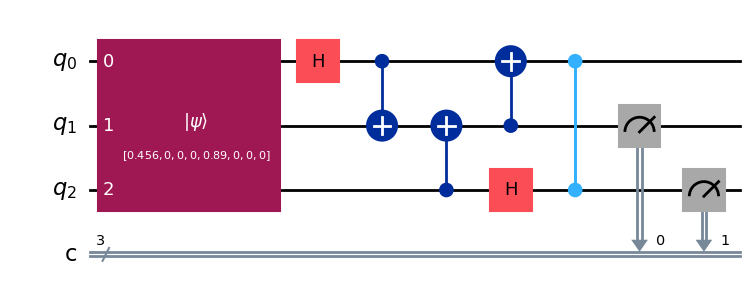

In [72]:
circuit = QuantumCircuit(3, 3)
circuit.initialize(initialState)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(2, 1)
circuit.h(2)
circuit.cx(1, 0)
circuit.cz(2, 0)
circuit.measure(1, 0)
circuit.measure(2, 1)
circuit.draw("mpl")

In [73]:
backend = Aer.get_backend('statevector_simulator')
compiled = transpile(circuit, backend)
job = backend.run(compiled, shots=2048)
result = job.result()

finalvector = result.get_statevector()
finalvector.draw("latex")

<IPython.core.display.Latex object>